Тема проекта: **Прогнозирование диабета**

Выполнили: **Ходацкий Богдан, Кавторин Даниил**

Преподаватель: **Шпаковская Ирина Игоревна**

## План проекта:
1) Цель и задачи исследования.
2) Описание набора данных.
3) Разведочный анализ данных.
4) Создание модели.
5) Выводы.

## 1. Цель и задачи исследования:

- Диабет - это хроническое заболевание, при котором уровень сахара в крови (глюкозы) в организме слишком высокий. Глюкоза является основным источником энергии для клеток организма. Она поступает в клетки с пищей и перерабатывается с помощью инсулина, гормона, вырабатываемого поджелудочной железой.
    
    При диабете поджелудочная железа не вырабатывает достаточно инсулина или организм не способен эффективно использовать инсулин. В результате уровень сахара в крови остается высоким.

    Диабет может привести к серьезным осложнениям, включая сердечные заболевания, инсульт, слепоту, почечную недостаточность и неврологические нарушения.

- В этом проекте мы будем использовать набор данных с информацией о пациентах для создания модели машинного обучения, цель состоит в том, чтобы на основе диагностических измерений предсказать, есть ли у пациента сахарный диабет. Это может помочь увидеть риски развития заболевания у разных людей, раньше выявлять диабет, что, возможно, способно предотвратить развитие тяжелых осложнений.

## 2. Описание набора данных:
Источник данных (Kaggle): [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

Данные представлены в виде табличного .csv файла, в котором содержатся сведения из Национального института диабета, заболеваний органов пищеварения и почек. Для отбора данных в представленном наборе из более обширной базы данных была выбрана определенная группа людей. В частности, все пациенты здесь - женщины в возрасте не менее 21 года, происходящие из индийского племени Пима.

Описание показателей, хранящихся в таблице:
1. **(Pregnancies) Беременности:** количество беременностей
2. **(Glucose) Глюкоза:** концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе
3. **(BloodPressure) Артериальное давление:** диастолическое артериальное давление (мм рт.ст.)
4. **(SkinThickness) Толщина кожи:** толщина кожной складки на трицепсе (мм)
5. **(Insulin) Инсулин:** 2-часовой сывороточный инсулин (мкме/мл)
6. **(BMI) ИМТ:** индекс массы тела (вес в кг/(рост в м)^2)
7. **(DiabetesPedigreeFunction) Функция предрасположенности к диабету:** функция родословной диабета
8. **(Age) Возраст:** возраст (лет)
9. **(Outcome) Результат:** наличие/отсутствие диагнострированного диабета (0/1)

## 3. Разведочный анализ данных (EDA):

### Добавление библиотек:

In [136]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Импорт данных:

In [137]:
df = pd.read_csv('../input/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Проверка данных на дубликаты, отсутствующие и нулевые значения:

Проверим наличие дубликатов данных:

In [139]:
df.duplicated().sum()

0

Дубликатов нет, проверим на отсутствующие значения:

In [140]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Пустых ячеек нет, проверим на нули:

In [141]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Заменим нулевые значения на медианные:

In [142]:
df['Glucose'] = df['Glucose'].replace(0, np.median(df['Glucose']))
df['BloodPressure'] = df['BloodPressure'].replace(0, np.median(df['BloodPressure']))
df['SkinThickness'] = df['SkinThickness'].replace(0, np.median(df['SkinThickness']))
df['Insulin'] = df['Insulin'].replace(0, np.median(df['Insulin']))
df['BMI'] = df['BMI'].replace(0, np.median(df['BMI']))
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Пропущенных значений больше нет.

### Визуализация данных:

### Цвета:

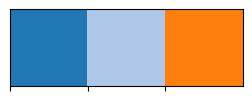

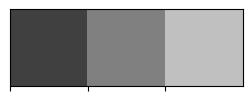

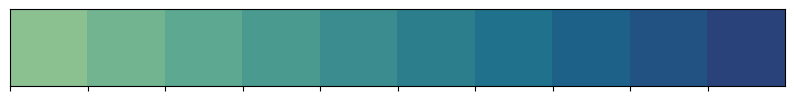

In [143]:
colors = sns.color_palette('tab20', 3).as_hex()
colors_gray = sns.color_palette('gray', 3).as_hex()
colors_gradient = sns.color_palette('crest', 10).as_hex()

sns.palplot(colors)
sns.palplot(colors_gray)
sns.palplot(colors_gradient)

### Распределение по показателям:

In [144]:
fig = px.histogram(
    df,
    x='Pregnancies',
    color='Outcome',
    template='plotly_white',
    marginal='box', opacity=0.7, nbins=100,
    color_discrete_sequence=colors,
    barmode='group', histfunc='count'
)

fig.update_layout(
    font_family='monospace',
    title=dict(
        text='Распределение по количеству беременностей',
        x=0.5, y=0.95,
        font=dict(color=colors_gray[1], size=20)
    ),
    xaxis_title_text='Количество беременностей',
    yaxis_title_text='Количество пациентов',
    legend=dict(
        x=1, y=0.96,
        bordercolor=colors_gray[2],
        borderwidth=0, tracegroupgap=5
    ),
    bargap=0.3,
)

fig.show()

In [145]:
fig = px.histogram(
    df,
    x='Glucose',
    color='Outcome',
    template='plotly_white',
    marginal='box', opacity=0.7, nbins=100,
    color_discrete_sequence=colors,
    barmode='group', histfunc='count'
)

fig.update_layout(
    font_family='monospace',
    title=dict(
        text='Распределение по уровню глюкозы',
        x=0.5, y=0.95,
        font=dict(color=colors_gray[1], size=20)
    ),
    xaxis_title_text='Концентрация глюкозы',
    yaxis_title_text='Количество пациентов',
    legend=dict(
        x=1, y=0.96,
        bordercolor=colors_gray[2],
        borderwidth=0, tracegroupgap=5
    ),
    bargap=0.3,
)

fig.show()

In [146]:
fig = px.histogram(
    df,
    x='BloodPressure',
    color='Outcome',
    template='plotly_white',
    marginal='box', opacity=0.7, nbins=100,
    color_discrete_sequence=colors,
    barmode='group', histfunc='count'
)

fig.update_layout(
    font_family='monospace',
    title=dict(
        text='Распределение по уровню кровяного давления',
        x=0.5, y=0.95,
        font=dict(color=colors_gray[1], size=20)
    ),
    xaxis_title_text='Диастолическое артериальное давление (мм рт.ст.)',
    yaxis_title_text='Количество пациентов',
    legend=dict(
        x=1, y=0.96,
        bordercolor=colors_gray[2],
        borderwidth=0, tracegroupgap=5
    ),
    bargap=0.3,
)

fig.show()

In [147]:
fig = px.histogram(
    df,
    x='SkinThickness',
    color='Outcome',
    template='plotly_white',
    marginal='box', opacity=0.7, nbins=100,
    color_discrete_sequence=colors,
    barmode='group', histfunc='count'
)

fig.update_layout(
    font_family='monospace',
    title=dict(
        text='Распределение по толщине кожи',
        x=0.5, y=0.95,
        font=dict(color=colors_gray[1], size=20)
    ),
    xaxis_title_text='Толщина кожной складки на трицепсе (мм)',
    yaxis_title_text='Количество пациентов',
    legend=dict(
        x=1, y=0.96,
        bordercolor=colors_gray[2],
        borderwidth=0, tracegroupgap=5
    ),
    bargap=0.3,
)

fig.show()

In [148]:
fig = px.histogram(
    df,
    x='Insulin',
    color='Outcome',
    template='plotly_white',
    marginal='box', opacity=0.7, nbins=100,
    color_discrete_sequence=colors,
    barmode='group', histfunc='count'
)

fig.update_layout(
    font_family='monospace',
    title=dict(
        text='Распределение по уровню инсулина',
        x=0.5, y=0.95,
        font=dict(color=colors_gray[1], size=20)
    ),
    xaxis_title_text='2-часовой сывороточный инсулин (мкме/мл)',
    yaxis_title_text='Количество пациентов',
    legend=dict(
        x=1, y=0.96,
        bordercolor=colors_gray[2],
        borderwidth=0, tracegroupgap=5
    ),
    bargap=0.3,
)

fig.show()

In [149]:
fig = px.histogram(
    df,
    x='BMI',
    color='Outcome',
    template='plotly_white',
    marginal='box', opacity=0.7, nbins=100,
    color_discrete_sequence=colors,
    barmode='group', histfunc='count'
)

fig.update_layout(
    font_family='monospace',
    title=dict(
        text='Распределение по ИМТ',
        x=0.5, y=0.95,
        font=dict(color=colors_gray[1], size=20)
    ),
    xaxis_title_text='ИМТ',
    yaxis_title_text='Количество пациентов',
    legend=dict(
        x=1, y=0.96,
        bordercolor=colors_gray[2],
        borderwidth=0, tracegroupgap=5
    ),
    bargap=0.3,
)

fig.show()

In [150]:
fig = px.histogram(
    df,
    x='Age',
    color='Outcome',
    template='plotly_white',
    marginal='box', opacity=0.7, nbins=100,
     color_discrete_sequence=colors,
    barmode='group', histfunc='count'
)

fig.update_layout(
    font_family='monospace',
    title=dict(
        text='Распределение по возрасту',
        x=0.5, y=0.95,
        font=dict(color=colors_gray[1], size=20)
    ),
    xaxis_title_text='Возраст (лет)',
    yaxis_title_text='Количество пациентов',
    legend=dict(
        x=1, y=0.96,
        bordercolor=colors_gray[2],
        borderwidth=0, tracegroupgap=5
    ),
    bargap=0.3,
)

fig.show()

## Корреляция между данными:

In [151]:
cor = df.drop('Outcome', axis=1).corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


<Axes: >

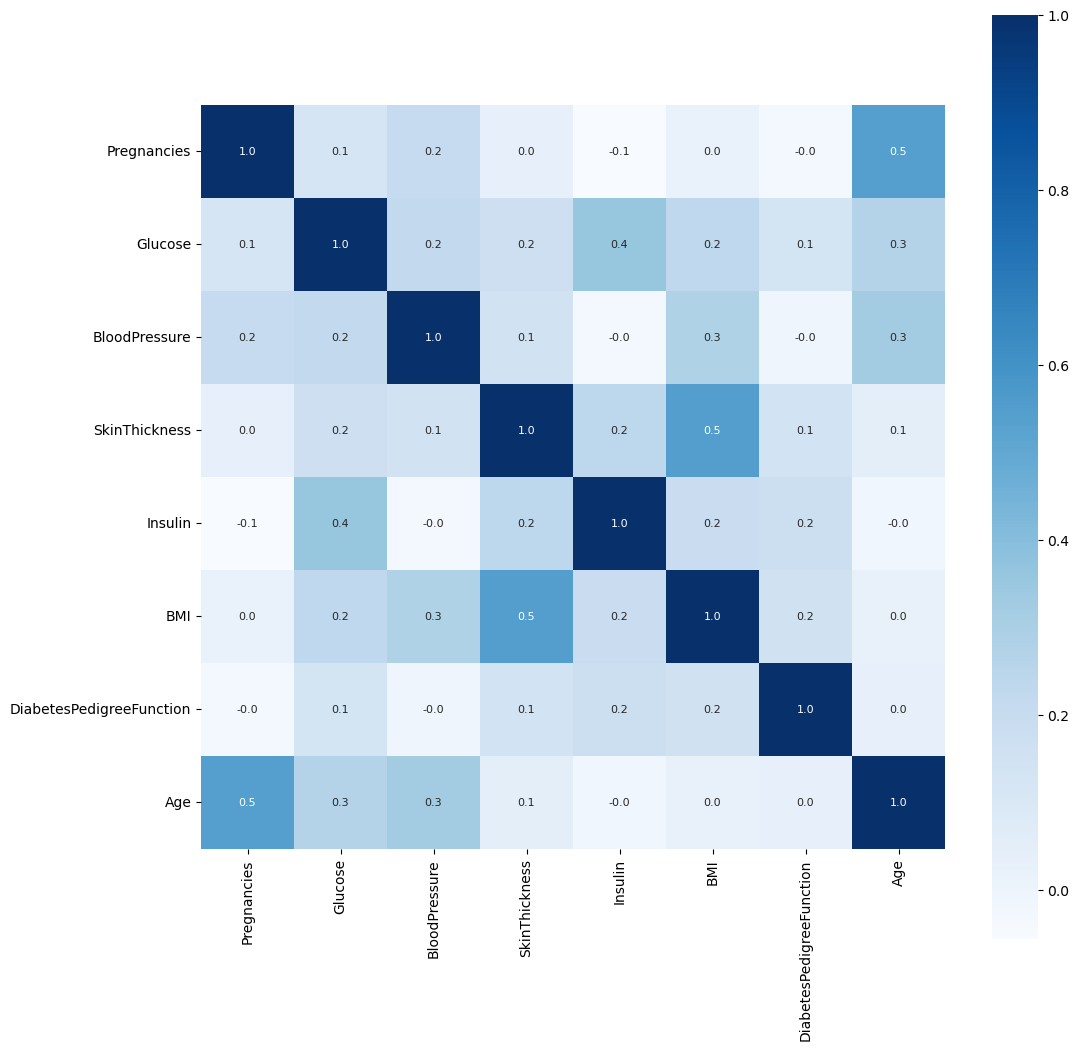

In [152]:
plt.figure(figsize=(12,12))
sns.heatmap(cor, 
            cbar=True, 
            square=True, fmt='.1f', 
            annot=True, 
            annot_kws={'size':8}, 
            cmap='Blues')

## 4. Создание модели:

### Разделим данные на матрицу признаков и ключевой вектор:

In [153]:
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

### Создадим из наших данных обучающий и тестовый наборы:

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Нормализуем наборы данных:

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Создадим модель логистической регрессии:

In [156]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

### Оценим точность модели:

In [135]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred) * 100

81.81818181818183

## 5. Вывод:
В данной работе была разработана модель логистической регрессии для определения диабета у пациентов. Модель была обучена на наборе данных, содержащем показатели пациентов, такие как возраст, давление, индекс массы тела, уровень глюкозы в крови и другие.

Результаты обучения модели показали, что она имеет достаточно высокую точность. На тестовом наборе данных модель показала точность 82%, что означает, что она правильно определила диабет у 82% пациентов.

Для дальнейшего улучшения модели можно рассмотреть следующие варианты:

- Использование более крупных наборов данных. Это позволит модели лучше обобщать результаты на новые данные.
- Использование дополнительных признаков. Например, можно включить в набор данных данные о семейной истории диабета, диете и образе жизни пациента.
- Использование более сложных методов обучения. Например, можно использовать методы машинного обучения, основанные на нейронных сетях.

Исследование этих вариантов может привести к созданию модели с большей точностью и эффективностью, в дальнейшем и модель может быть использована для диагностики диабета у пациентов на ранних стадиях заболевания. Это может помочь врачам своевременно начать лечение и предотвратить развитие осложнений.